# Variables aléatoires discrètes

## 1 Exemple introductif

### 1.1 Calculs exacts

a. Gains pour toutes les issues possibles :

In [8]:
gains = []
for de1 in range(1,6+1):
    for de2 in range(1,6+1):
        gains.append(de1+de2)

print(gains)

[2, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 8, 4, 5, 6, 7, 8, 9, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10, 11, 7, 8, 9, 10, 11, 12]


b. Loi de probabilité :

In [2]:
import numpy as np
omegax = list(range(2,12+1))
loi = []
for k in omegax:
    pk = gains.count(k) / len(gains)
    loi.append((k,pk))
print(loi)

[(2, 0.027777777777777776), (3, 0.05555555555555555), (4, 0.08333333333333333), (5, 0.1111111111111111), (6, 0.1388888888888889), (7, 0.16666666666666666), (8, 0.1388888888888889), (9, 0.1111111111111111), (10, 0.08333333333333333), (11, 0.05555555555555555), (12, 0.027777777777777776)]


c. Calcul de l'espérance :

In [6]:
esperance = 0
for  (k,pk) in loi:
    esperance += k * pk
print(esperance)

6.999999999999999


d. Calcul de la variance :

In [7]:
variance = 0
for (k,pk) in loi:
    variance = variance + (k ** 2) * pk
variance = variance - esperance ** 2
print(variance)

5.833333333333336


### 1.2 Simulation

#### Loi de probabilité

In [9]:
import random

def simulation_experience():
    return random.choices([1, 2, 3, 4, 5, 6], k=10)

In [10]:
def fun_X(des):
    return sum(des)

In [11]:
def simulation_repetee(exp, X, nrep):
    return [X(exp()) for _ in range(nrep)]

In [12]:
import random
import numpy

def estimation_loi(valeurs_obtenues, valeurs_possibles):
    # Ensemble des valeurs différentes possibles
    # prises par la variable aléatoire
    omegax = valeurs_possibles
    # On calcule ensuite le nombre de fois où chaque
    # valeur de Omega_X apparait dans l'ensemble des valeurs 
    # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
    res = []
    for k in omegax :
        res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
    return res

In [13]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 1000)
loi = estimation_loi(valeurs_simulees, list(range(10,60+1)))
print(loi)

[(10, 0.0), (11, 0.0), (12, 0.0), (13, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0), (19, 0.0), (20, 0.001), (21, 0.001), (22, 0.003), (23, 0.006), (24, 0.007), (25, 0.012), (26, 0.026), (27, 0.021), (28, 0.026), (29, 0.044), (30, 0.057), (31, 0.053), (32, 0.067), (33, 0.071), (34, 0.071), (35, 0.066), (36, 0.073), (37, 0.066), (38, 0.067), (39, 0.062), (40, 0.041), (41, 0.048), (42, 0.034), (43, 0.021), (44, 0.017), (45, 0.012), (46, 0.006), (47, 0.008), (48, 0.009), (49, 0.003), (50, 0.0), (51, 0.001), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.0), (59, 0.0), (60, 0.0)]


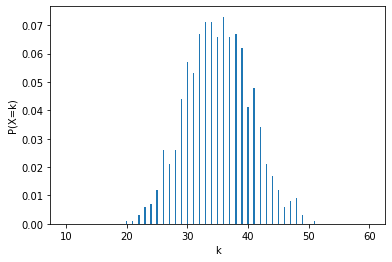

In [14]:
import matplotlib
import matplotlib.pyplot as plt

x = []
y = []
for (k,pk) in loi :
    x.append(k)
    y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

#### Cas où oméga de x est difficile à déterminer

In [16]:
def estimation_loi(valeurs_obtenues, valeurs_possibles = None):
    # On détermine Omega_X
    if valeurs_possibles is None :
        omegax = numpy.unique(valeurs_obtenues)
    else :
        omegax = valeurs_possibles
    # On calcule ensuite le nombre de fois où chaque
    # valeur de Omega_X apparait dans l'ensemble des valeurs 
    # que l'on divise par le nombre de répétitions (i.e. le nombre de valeurs)
    res = []
    for k in omegax :
        res.append((k, valeurs_obtenues.count(k) / len(valeurs_obtenues)))
    return res

In [17]:
valeurs_simulees = simulation_repetee(simulation_experience, fun_X, 10000)
loi = estimation_loi(valeurs_simulees)
print(loi)

[(15, 0.0002), (16, 0.0001), (17, 0.0004), (18, 0.0002), (19, 0.0007), (20, 0.0011), (21, 0.0023), (22, 0.0027), (23, 0.007), (24, 0.0118), (25, 0.013), (26, 0.0188), (27, 0.0266), (28, 0.0305), (29, 0.0387), (30, 0.0478), (31, 0.0548), (32, 0.0587), (33, 0.0714), (34, 0.0774), (35, 0.0766), (36, 0.0682), (37, 0.0686), (38, 0.0622), (39, 0.0543), (40, 0.0512), (41, 0.0407), (42, 0.0314), (43, 0.0258), (44, 0.0187), (45, 0.0123), (46, 0.0108), (47, 0.006), (48, 0.0031), (49, 0.0032), (50, 0.0015), (51, 0.0005), (52, 0.0003), (53, 0.0002), (54, 0.0002)]


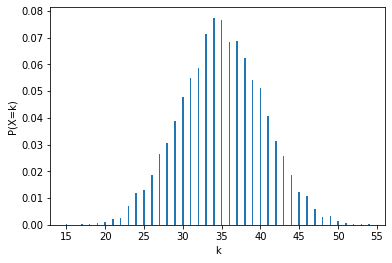

In [18]:
x = []
y = []
for (k,pk) in loi :
    x.append(k)
    y.append(pk)
plt.figure()
plt.bar(x,height = y, width = 0.2)
plt.xlabel("k")
plt.ylabel("P(X=k)")
plt.show()

## 2 Exercices

### 2.1 5000 simplifié